In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Style plot
plt.style.use('bmh')

In [2]:
from fbref import BotScrap

## Principal module to extract data:

In [3]:
data = BotScrap()

## Select how to scrap it:

I want to collect all the important information about the single game.

In [4]:
match_stats = data.get_match('https://fbref.com/en/matches/f1ecda2c/Manchester-United-Wolverhampton-Wanderers-August-14-2023-Premier-League')

`match_stats` will have all the data from game, including `Match`, `Home`, `Away`, `Shots` and `Stats`.

## Let's do the XT Measure:
For this I have to use the shots and select all the important aspects of each player.

In [5]:
### Select teams
home_team = match_stats['Home']['Home']
away_team = match_stats['Away']['Away']

In [6]:
# Home Team
home_shots = home_team['Summary'][['Player', 'Sh', 'xG', 'Pos', 'Min', 'Player ID']]
home_shots = home_shots[home_shots['Sh'] > 0]

# Away team
away_shots = away_team['Summary'][['Player', 'Sh', 'xG', 'Pos', 'Min', 'Player ID']]
away_shots = away_shots[away_shots['Sh'] > 0]

In [7]:
## Function to put the text to the side of the plot:
def text_plot(x, y, labels, color): 
    for x_val, y_val, name in zip(x, y, labels):
        plt.text(x_val + 0.07, y_val, name, fontsize=8, animated=True, ha='left', color=color, alpha=0.8)

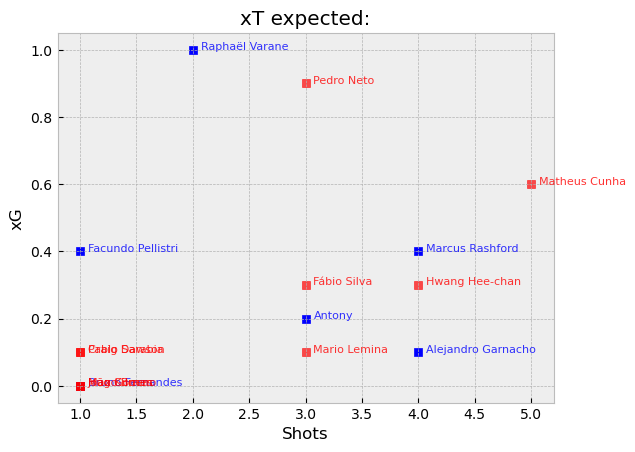

In [8]:
### Plot the data
# Home
plt.scatter(home_shots['Sh'].values, home_shots['xG'].values, color='blue', marker='s')
text_plot(home_shots['Sh'].values, home_shots['xG'].values, home_shots['Player'].values, 'blue')
#Away
plt.scatter(away_shots['Sh'].values, away_shots['xG'].values, color='red', marker='s', alpha=0.7)
text_plot(away_shots['Sh'].values, away_shots['xG'].values, away_shots['Player'].values, 'red')
##
plt.title('xT expected:')
plt.xlabel('Shots')
plt.ylabel('xG')
plt.grid(True)

## Passes overall for CM: 
Here I will take the passes of the midfielders measured with the actual passes.

In [95]:
## shots Info
# Home passes
home_passes = home_team['Passing']
home_passes = home_passes.loc[:, [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 3_level_0', 'Pos'), ('Unnamed: 5_level_0', 'Min'), ('Total', 'Cmp'), ('Total', 'Att'), ('Total', 'Cmp%')]]
### Minutes: 
home_passes = home_passes[home_passes[('Unnamed: 5_level_0', 'Min')] > 45]

# Away Passes
away_passes = away_team['Passing']
away_passes = away_passes.loc[:, [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 3_level_0', 'Pos'), ('Unnamed: 5_level_0', 'Min'), ('Total', 'Cmp'), ('Total', 'Att'), ('Total', 'Cmp%')]]
### Minutes:
away_passes = away_passes[away_passes[('Unnamed: 5_level_0', 'Min')] > 45]

In [101]:
### Function to return positions: 
def contains_pos(cell_value, pos):
    return pos in cell_value if pd.notna(cell_value) else False

## Home
home_pos = home_passes['Unnamed: 3_level_0'].applymap(lambda cell_value: contains_pos(cell_value, 'CM'))

## Away
away_pos = away_passes['Unnamed: 3_level_0'].applymap(lambda cell_value: contains_pos(cell_value, 'CM'))

### Filter the teams
home_passes = home_passes[home_pos['Pos'] == True]
away_passes = away_passes[away_pos['Pos'] == True]

away_passes

Unnamed: 0_level_0 Unnamed: 3_level_0 Unnamed: 5_level_0 Total          
              Player                Pos                Min   Cmp Att  Cmp%
4      Matheus Nunes           LM,AM,CM                 90    35  45  77.8
5       Mario Lemina              CM,DM                 90    42  52  80.8
6         João Gomes              CM,DM                 87    31  38  81.6

# Shots 